Lukas Pechacek

11954922



Title: Donating behaviour and social media, a digital trace data analysis for Conservation International

Introduction 

In the digitalized world of today, social media can act as a very valuable tool for non-governmental organizations (NGO’s). A low financial access barrier, combined with the potential to reach millions of users, gives social media an edge in digital marketing and advertising. Moreover, social media also allows for a connectivity between like-minded individuals that goes beyond social and geographical boundaries, creating a playing field for businesses and organizations to compete for influence (Clark & Themudo, 2006). NGOs require this field to communicate their programmes and causes to the public. Though NGOs have a non-profit nature to them, a need persists to maintain a financial income to maintain the continuance of its missions. As such, a widespread communication themed problem for NGOs is to develop sustainable relationships with donors and volunteers (Ozdemir, 2012). The NGO presented in this paper, Conservation International (CI), is an NGO operating worldwide to tackle issues on climate change and sustainability. While having a presence on all big social media platforms, the organization is struggling to drive traffic to its website where users can make donations. Furthermore, it is unclear what the role of its social media pages is in obtaining donations. The organization thus provides an interesting case to explore. This paper hopes to achieve an awareness in the importance of effectively using social media channels to extend user engagement to a donation-based engagement that will ultimately bring CI further in its mission to protect nature for the benefit t of all beings around the globe. As such, the overarching research question of this paper becomes: 
RQ1: To what extent do social media site referrals (Instagram, YouTube, Facebook, Twitter) and non-social media site referrals differ in terms of number of donations made and the amount donated (USD)?


The theory guiding this paper is centres on Kathleen Kelly’s stewardship theory. This theory entails that for non-profit organizations to be successful, leaders of such organizations must rely on continuous donations and public participation with the cause of the organization (Kelly, 2012). Essentially, a good relationship between an organization and its donors would require a nurturing of such relationship through donations and voluntary commitments and as a result, appreciation reports of such commitments (Pressgrove & McKeever, 2016). Since its initiation, social media has manifested itself as a platform that provides an interactive and communal channel of communication between organizations and the public. Ultimately, through engaging with the public on a more personal level, more meaningful relationships are constructed that result in more substantial behaviours of support (Men & Tsai, 2015). Management of organizations should focus on developing longer lasting relationships with donors to encourage more donations in the future as there has been a lack of repeat donations from first time donors. In line with good stewardship theory, highlighting social media as a promoter of healthy relationships between organizations and stakeholders, H1a and H1b of this paper state that:

H1a: Users being referred to the site via social media site will make higher donations (in USD) than users from other referral sites. 

H1b: Users being referred to the CI website via social media will make a higher number of donations than users from other referral sites.

Because of the many differences between platforms, such as Twitter being used for microblogging, YouTube for watching video content, Instagram for photo sharing and Facebook as a social networking site, the relationships built between organizations and stakeholders may differ depending on the platform. However, Facebook is the only platform that lets organizations and users alike communicate in more elaborate ways and messages (Voorveld, et al. 2018). Thus, there is a chance of fostering a stronger relationship than on other platforms. Furthermore, Andersson and Wikstroem (2017) have found in their study on how social media is used in the stakeholder context, that companies have more difficulties using Twitter than other social media platforms. Adding to this, Facebook scored the highest on the factors of user engagement and social interaction in a study by Voorveld, et al. (2018) on engagement with different social media platforms and advertisement campaigns on such platforms. Bearing in mind the popularity of Facebook and its wider perceived contextual use than Twitter, YouTube and Instagram, it seems plausible to believe that Facebook will be the greatest influence in monetary contribution to CI’s donation base. As such, H2a and H2b become:

H2a: Users being referred to the site via Facebook make higher donations (in USD) than users from other social media sites. 

H2b: Users being referred to the site via Facebook will make a higher number of donations than users from other social media referral sites. 


Gathering the data

The type of data that was collected for this research resembles that of digital trace data. When users navigate to the CI website to donate, the information per user is stored in an internal database. Though noting that this data set has been simulated upon request, the data was extracted and made available to the researcher. The original data set contained 30000 cases and the variables of age, geolocation, session id, device and referral site. These variables were deemed important in highlighting a potential influence on whether a user donated to the cause and the amount donated. A second dataset contained the values of amount donated as well as the binary of whether a user donated. However, the data extracted only provided cases that did in fact donate. While CI also allows for donations to take place via their Facebook page, for this analysis only donations that were made on the CI website are to be considered. To answer the overarching research question of this paper, it is thus necessary for the researcher to know from which platform users came to the website. The further variables were also useful and used as control variables that could yield influence on the outcome variables. The datasets were loaded in the Pandas package in Python. After inspecting and cleaning, the two data sets were then merged two times, one time for each overarching hypothesis. Moreover, the data was not collected by the researcher, thus also allowing for bias in the way the data was gathered. Furthermore, the variables available are also indicative of an element of bias, as more variables could yield a different outcome on the analysis. Regarding privacy, it should be noted here that none of the cases to be analysed were consensually briefed on their data being used. As such, this data was handled with great care and no further parties were involved in this research. 

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import lime
from lime import lime_tabular

The folloing data preperation and cleaning processes correspond to H1a and H1b of this paper. A new data set with different data preperation will be used for H2a and H2b. The cleaning process of this data set will follow the analysis for H1a and H1b

Loading data. 

In [9]:
sessions = pd.read_csv('LukasPechacek_session_info.csv.gz')

Initial data inspection

In [10]:
sessions

,Unnamed: 0,referral,age,geolocation,device,session_id
0,0,NaN,44,NaN,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,560923
1,1,NaN,62,US,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,560924
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926
4,4,google.com,40,US,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,560927
...,...,...,...,...,...,...
29995,29995,Instagram.com,67,US,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,590918
29996,29996,youtube.com,20,NaN,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,590919
29997,29997,youtube.com,65,US,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,590920
29998,29998,youtube.com,28,US,Mozilla/5.0 (iPhone; CPU iPhone OS 5_1_1 like ...,590921


Checking descriptives for age variable

In [11]:
sessions['age'].describe()

count   30000.000
mean       45.881
std        16.489
min        18.000
25%        31.000
50%        46.000
75%        60.000
max        74.000
Name: age, dtype: float64

Checking dataframe for missing values

In [12]:
sessions.isna().sum()

Unnamed: 0        0
referral       6660
age               0
geolocation    5031
device            0
session_id        0
dtype: int64

In [13]:
sessions.dtypes

Unnamed: 0      int64
referral       object
age             int64
geolocation    object
device         object
session_id      int64
dtype: object

Creating binary variable for device, whether user is using a mobile or desktop device

In [14]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

In [15]:
sessions['mobile'] = sessions['device'].apply(wordlist_any_present, args=(['Mobile', 'iPhone'], ))

Checking resulting value counts from variable creation 'mobile'

In [16]:
sessions['mobile'].value_counts()

0    24441
1     5559
Name: mobile, dtype: int64

In [17]:
sessions['desktop'] = sessions['device'].apply(wordlist_any_present, args=(['Windows', 'Macintosh', 'Linux'], ))

Checking resulting value counts from variable creation 'desktop'. The numbers from the two newly created variables seem to match up.

In [18]:
sessions['desktop'].value_counts()

1    24441
0     5559
Name: desktop, dtype: int64

Creating binary variable for social media. This is to see whether the user entered the site through a social media website (Youtube, Twitter, Facebook or Instagram) or a different site. This will be used to test H1a and H1b

In [19]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

Applying function

In [20]:
sessions['social media'] = sessions['referral'].apply(wordlist_any_present, args=(['twitter', 'youtube', 'facebook', 'Instagram'], ))

In [21]:
sessions['social media'].value_counts()

0    16694
1    13306
Name: social media, dtype: int64

Checking if variable creation worked by inspecting head of dataframe

In [22]:
sessions.head()

,Unnamed: 0,referral,age,geolocation,device,session_id,mobile,desktop,social media
0,0,NaN,44,NaN,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,560923,0,1,0
1,1,NaN,62,US,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,560924,0,1,0
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925,0,1,1
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926,0,1,1
4,4,google.com,40,US,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,560927,0,1,0


Cheking descriptive statistics and value counts for site referral

In [23]:
sessions['referral'].value_counts()

Instagram.com          3395
twitter.com            3325
google.com             3323
youtube.com            3315
Facebook.com           3271
                       ... 
daniel-becker.net         1
simmons-davis.com         1
baker-rasmussen.com       1
hicks.info                1
gibbs-edwards.com         1
Name: referral, Length: 4228, dtype: int64

In [24]:
sessions['referral'].describe()

count             23340
unique             4228
top       Instagram.com
freq               3395
Name: referral, dtype: object

Filling missing values in referral site as 'other'. This is because we do not know if the user came from a social media site or not. After running descriptive tests it has been established that most of the 30000 cases are from non social media referral, therefore justifying this action.

In [25]:
sessions ['referral_page'] = sessions ['referral'].fillna('other')

Checking if filling missing values worked

In [26]:
sessions['referral_page'].isna().sum()

0

In [27]:
sessions.head()

,Unnamed: 0,referral,age,geolocation,device,session_id,mobile,desktop,social media,referral_page
0,0,NaN,44,NaN,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,560923,0,1,0,other
1,1,NaN,62,US,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,560924,0,1,0,other
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925,0,1,1,twitter.com
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926,0,1,1,youtube.com
4,4,google.com,40,US,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,560927,0,1,0,google.com


Creating dataframe to be used for merge

In [28]:
sessions_merge = sessions [['session_id', 'referral_page', 'social media', 'mobile', 'desktop', 'device', 'age']]

In [29]:
sessions_merge.head()

,session_id,referral_page,social media,mobile,desktop,device,age
0,560923,other,0,0,1,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,44
1,560924,other,0,0,1,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,62
2,560925,twitter.com,1,0,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,49
3,560926,youtube.com,1,0,1,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,36
4,560927,google.com,0,0,1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,40


Loading data set with number of donations and amount donated

In [30]:
donations = pd.read_json('LukasPechacek_donation_metrics.jsonl', lines = True)

In [31]:
donations

,data
0,"{'donation': 1.0, 'donation_amount': 131.0, 'i..."
1,"{'donation': 1.0, 'donation_amount': 131.0, 'i..."
2,"{'donation': 1.0, 'donation_amount': 123.0, 'i..."
3,"{'donation': 1.0, 'donation_amount': 163.0, 'i..."
4,"{'donation': 1.0, 'donation_amount': 172.0, 'i..."
...,...
11542,"{'donation': 1.0, 'donation_amount': 114.0, 'i..."
11543,"{'donation': 1.0, 'donation_amount': 158.0, 'i..."
11544,"{'donation': 1.0, 'donation_amount': 123.0, 'i..."
11545,"{'donation': 1.0, 'donation_amount': 254.0, 'i..."


Normalizing content of column 'data' in donations dataframe

In [32]:
donations = pd.json_normalize(donations['data'])

In [33]:
donations

,donation,donation_amount,id
0,1.000,131.000,560924
1,1.000,131.000,560926
2,1.000,123.000,560933
3,1.000,163.000,560935
4,1.000,172.000,560937
...,...,...,...
11542,1.000,114.000,590917
11543,1.000,158.000,590918
11544,1.000,123.000,590920
11545,1.000,254.000,590921


Inspecting descriptives in donations dataframe for any unusual or impossible values

In [34]:
donations.describe()

,donation,donation_amount,id
count,11547.000,11547.000,11547.000
mean,1.000,150.192,575967.185
std,0.000,39.248,8624.370
min,1.000,25.000,560924.000
25%,1.000,123.000,568430.000
50%,1.000,140.000,576013.000
75%,1.000,166.000,583390.000
max,1.000,289.000,590922.000


Checking data types in dataframe

In [35]:
donations.dtypes

donation           float64
donation_amount    float64
id                   int64
dtype: object

Renaming column to which merge will be conducted

In [36]:
donations.rename(columns = {'id': 'session_id'}, inplace = True) 

Inspecting head of dataframe

In [37]:
donations.head()

,donation,donation_amount,session_id
0,1.000,131.000,560924
1,1.000,131.000,560926
2,1.000,123.000,560933
3,1.000,163.000,560935
4,1.000,172.000,560937


Merging data sets. An outer merge has been opted for in order to keep all cases. This is because based on the data available, those that did not donate are not included in the data set. As such, these missing cases can be filled with the value '0'

In [38]:
donationsFinal = sessions_merge.merge(donations, on='session_id', how='outer')

Inpecting head of merged dataframe

In [39]:
donationsFinal.head()

,session_id,referral_page,social media,mobile,desktop,device,age,donation,donation_amount
0,560923,other,0,0,1,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,44,NaN,NaN
1,560924,other,0,0,1,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,62,1.000,131.000
2,560925,twitter.com,1,0,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,49,NaN,NaN
3,560926,youtube.com,1,0,1,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,36,1.000,131.000
4,560927,google.com,0,0,1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,40,NaN,NaN


Filling missing values in donation and amount donated (USD) with 0. This is because it can be assumed here that users did not make a donation. Donation is a binary variable, 0 indicating no donation has been made. 

In [40]:
donationsFinal ['donation_made'] = donationsFinal['donation'].fillna(0)

Checking head of data frame to see if function worked

In [41]:
donationsFinal.head()

,session_id,referral_page,social media,mobile,desktop,device,age,donation,donation_amount,donation_made
0,560923,other,0,0,1,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,44,NaN,NaN,0.000
1,560924,other,0,0,1,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,62,1.000,131.000,1.000
2,560925,twitter.com,1,0,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,49,NaN,NaN,0.000
3,560926,youtube.com,1,0,1,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,36,1.000,131.000,1.000
4,560927,google.com,0,0,1,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,40,NaN,NaN,0.000


In [42]:
donationsFinal ['amount_donated'] = donationsFinal['donation_amount'].fillna(0)

Checking if function has worked correctly

In [43]:
donationsFinal.tail()

,session_id,referral_page,social media,mobile,desktop,device,age,donation,donation_amount,donation_made,amount_donated
29995,590918,Instagram.com,1,0,1,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,67,1.000,158.000,1.000,158.000
29996,590919,youtube.com,1,0,1,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,20,NaN,NaN,0.000,0.000
29997,590920,youtube.com,1,0,1,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,65,1.000,123.000,1.000,123.000
29998,590921,youtube.com,1,1,0,Mozilla/5.0 (iPhone; CPU iPhone OS 5_1_1 like ...,28,1.000,254.000,1.000,254.000
29999,590922,youtube.com,1,0,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,66,1.000,201.000,1.000,201.000


Final variables to be included in dataframe

In [157]:
DonationsFinalDF = donationsFinal [['session_id', 'referral_page', 'social media', 'mobile', 'desktop', 'device', 'donation_made', 'amount_donated', 'age']]

Checking if function worked 

In [158]:
DonationsFinalDF.tail()

,session_id,referral_page,social media,mobile,desktop,device,donation_made,amount_donated,age
29995,590918,Instagram.com,1,0,1,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,1.000,158.000,67
29996,590919,youtube.com,1,0,1,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0.000,0.000,20
29997,590920,youtube.com,1,0,1,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1.000,123.000,65
29998,590921,youtube.com,1,1,0,Mozilla/5.0 (iPhone; CPU iPhone OS 5_1_1 like ...,1.000,254.000,28
29999,590922,youtube.com,1,0,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1.000,201.000,66


Checking if there are any missing values in final dataframe.

In [159]:
DonationsFinalDF.isna().sum()

session_id        0
referral_page     0
social media      0
mobile            0
desktop           0
device            0
donation_made     0
amount_donated    0
age               0
dtype: int64

Data exploration and evaluation for H1a and H1b

Descriptive statisitcs for all variables used in the analysis.

Running a few univariate and descriptive statistics show that there is a higher number of users that entered the site through a non-social media site (N=16694) than from social media sites (N=13306). After running a descriptive test on all variable to be used for H1a and H1b it can be observed that for the dependent variable, ‘amount donated’, the mean amount donated is USD57.81. Furthermore, when combining this with the independent variable of ‘social media’, it can be observed that the average amount donated is much higher when the site referral is from a social media site, suggesting that social media site referrals may be an influential factor influencing the amount of USD donated. The mean number of US dollars donated when users come from a social media site is USD100.98, while the mean amount donated if the referral is not from a social media site is USD23.40. This effect can also be observed in the bar plot, suggesting that the relationship will be significant (code 120). The relationship between the binary variable of whether a donation is made and whether the site referral is from social media also seem to give an indication of a significant relationship, as portrayed by the bar plot (code 121). The control variable of age indicates a mean of 45 years old with a range from the minimum age of 18 years old to the maximum age of 74 years old. The control variable of Mobile also indicates that users donated using a mobile device much more than a desktop, also hinting at a statistically significant relationship. 

Independent variable: Social media. This variable has been created from the 'referral_page' variable. The new variable indicated whether users entered the CI website through social media, scored by '1', or by another referral page that is not categorized as either Instagram, YouTube, Facebook or Twitter, scored by '0'.

In [160]:
DonationsFinalDF['social media'].describe()

count   30000.000
mean        0.444
std         0.497
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: social media, dtype: float64

Dependent variable for H1a: donation_made. This variable is binary indicated whether a user entering the CI website made a donation, scored as '1' or did not make a donation, scored as '0'.

In [161]:
DonationsFinalDF['donation_made'].describe()

count   30000.000
mean        0.385
std         0.487
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: donation_made, dtype: float64

In [162]:
DonationsFinalDF['donation_made'].value_counts()

0.000    18453
1.000    11547
Name: donation_made, dtype: int64

Dependent variable for H1b: amount_donated. This variables is a continous variable indicated how much (in USD) has been donated by users that made a donation. The highest donation made is USD289 with a mean amount of donations in USD of USD57.81

In [163]:
DonationsFinalDF['amount_donated'].describe()

count   30000.000
mean       57.809
std        77.030
min         0.000
25%         0.000
50%         0.000
75%       131.000
max       289.000
Name: amount_donated, dtype: float64

Control variables for H1: Mobile. This binary variable has been created out of the 'device' column, and indicated whether the user entered the site using a mobile phone device. 

In [164]:
DonationsFinalDF['mobile'].describe()

count   30000.000
mean        0.185
std         0.389
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: mobile, dtype: float64

Control variable for H1: Desktop. This binary variable has been created out of the 'device' column, and indicates whether the user entered the site using a desktop device.

In [165]:
DonationsFinalDF['desktop'].describe()

count   30000.000
mean        0.815
std         0.389
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: desktop, dtype: float64

Control variable for H1: Age. 

In [166]:
DonationsFinalDF['age'].describe()

count   30000.000
mean       45.881
std        16.489
min        18.000
25%        31.000
50%        46.000
75%        60.000
max        74.000
Name: age, dtype: float64

Control variable for H1: Age. This variable indicated the age at which users entered the site and made a donation, according the data collected. The mean age is 45 years old with a range from the minimum age of 18 years old to the maximum age of 74 years old.

In [735]:
##All descriptives for all  variables to be used in the analysis
DonationsFinalDF[['social media', 'donation_made', 'amount_donated', 'mobile', 'desktop', 'age']].describe()

,social media,donation_made,amount_donated,mobile,desktop,age
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,0.444,0.385,57.809,0.185,0.815,45.881
std,0.497,0.487,77.030,0.389,0.389,16.489
min,0.000,0.000,0.000,0.000,0.000,18.000
25%,0.000,0.000,0.000,0.000,1.000,31.000
50%,0.000,0.000,0.000,0.000,1.000,46.000
75%,1.000,1.000,131.000,0.000,1.000,60.000
max,1.000,1.000,289.000,1.000,1.000,74.000


Descriptive statistics grouped by whether users came froma social media website or not and the amount donated. Amount donated is much higher when the site referral is from a social media site, suggesting that social media site referrals may be an influential factor influencing the amount of USD donated. 

In [117]:
DonationsFinalDF.groupby(['social media'])['amount_donated'].describe()

,count,mean,std,min,25%,50%,75%,max
social media,,,,,,,,
0,16694.000,23.397,52.294,0.000,0.000,0.000,0.000,268.000
1,13306.000,100.983,81.226,0.000,0.000,123.000,158.000,289.000


Univariate visualizations

C:\Users\Lukas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_donated', ylabel='Density'>

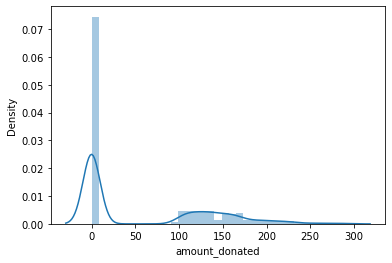

In [734]:
##Distribution plot on amount donated from users entering the CI website
sns.distplot(DonationsFinalDF['amount_donated'])

C:\Users\Lukas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

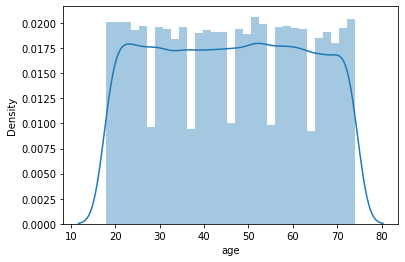

In [733]:
##Distribution plot for control variable 'age'
sns.distplot(DonationsFinalDF['age'])

<AxesSubplot:xlabel='social media', ylabel='count'>

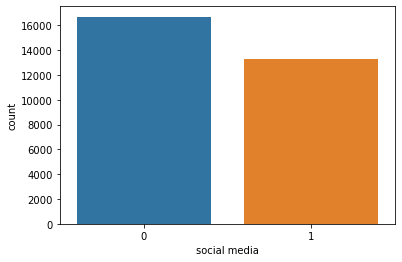

In [732]:
##Bar plot indicating how many site referrals came from social media websites (1) and other websites (0).
sns.countplot(x='social media', data=DonationsFinalDF)

In [739]:
##value counts for those coming from social media sites and those from other site referral, as shows in the barplot above
DonationsFinalDF['social media'].value_counts()

0    16694
1    13306
Name: social media, dtype: int64

<AxesSubplot:xlabel='donation_made', ylabel='count'>

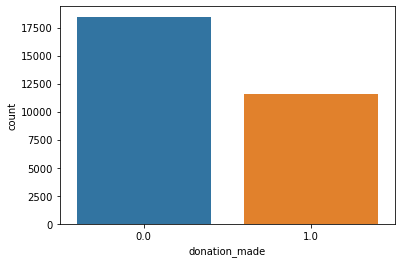

In [731]:
##Barplot showing the number of donations made in total compared to those that did not make a donation
sns.countplot(x='donation_made', data=DonationsFinalDF)

Barplot indicating the amount donated whether the website referral is from a social media site or not. Results show a clear relationship that the average amount donated goes up significantly if the referral is from a social media site. 

<AxesSubplot:xlabel='social media', ylabel='amount_donated'>

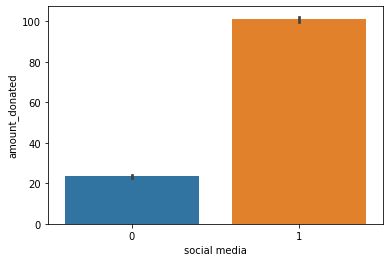

In [120]:
sns.barplot(x='social media', y='amount_donated', data=DonationsFinalDF)

<AxesSubplot:xlabel='social media', ylabel='donation_made'>

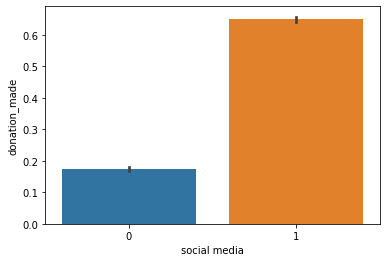

In [730]:
##Barplot indicating the relationship between whether the user came from a social media site or not and whether the user made a donation
sns.barplot(x='social media', y='donation_made', data=DonationsFinalDF)

<AxesSubplot:xlabel='mobile', ylabel='donation_made'>

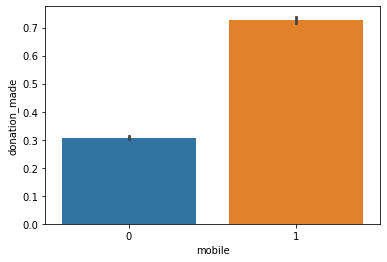

In [729]:
##Barplot indicating a relationship between the control variable 'mobile' and whether a donation has been made
sns.barplot(x='mobile', y='donation_made', data=DonationsFinalDF)

Predictive analytics with scikit

H1a: Users being referred to the site via social media site will make higher donations (in USD) than users from other referral sites. 

Testing the hypothesis using linear regression from the imported package. Specified 'amount_donated' as the dependent variable, followed by the independent and control variables. Due to having multiple control variables and a continous dependent variable alongside the independent variable and quantity is tested, a linear regression analysis will be used 

In [588]:
ols_stat = sm.OLS(DonationsFinalDF['amount_donated'], sm.add_constant(DonationsFinalDF[['social media', 'mobile', 'age']]))

Asking model to run

In [589]:
result_ols = ols_stat.fit()

Print summary of the model

In [590]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         amount_donated   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7028.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:41:31   Log-Likelihood:            -1.6491e+05
No. Observations:               30000   AIC:                         3.298e+05
Df Residuals:                   29996   BIC:                         3.299e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0125      1.065      7.527   

Using machine learning for predictive analytics and creating machine learning classifier

In [591]:
ols_clf = LinearRegression(fit_intercept = True) 

Using fit_intercept to make sure we are using the same model

In [592]:
ols_clf.fit(DonationsFinalDF[['social media', 'mobile', 'age']], DonationsFinalDF['amount_donated'])

LinearRegression()

Predicting different combinations of independent and control variables on the dependent variable. First prediction is using the social media variable, in combination with the mobile variable without the age variable. The result is that a predicted amount of USD165.68 is donated

In [593]:
ols_clf.predict([[1,1,0]])

array([165.68057492])

The second prediction is using the social media variable without the variable indicating whether the user used a mobile device but including the age variable. The result is that a predicted amount of USD85.80 is donated.

In [594]:
ols_clf.predict([[1,0,1]])

array([85.8098609])

To test H1a of the study, a linear regression statistical model has been created due to the outcome variable, amount donated in USD, being continuous. The linear regression model shows that users coming from a social media site compared to a non-social media site donate more money to the cause. This effect is statistically significant and positive. Accounting for the control variable, using a mobile device compared to desktop device also increases the amount of money being donated. This effect is also positive and statistically significant. The control variable age does not indicate a significant effect on the amount donated. These effects can also be observed in the different combinations between independent and control variables. These predictions on combinations conform with the overall model in which age is not a significant influence on the amount donated. Overall, H1a can be retained. Social media website referrals make higher donations than users from non-social media referral sites. Using a mobile device also increases the amount being donated, this effect is also statistically significant. The control variable of age does not have a significant effect on the amount donated. 

In [595]:
from sklearn.model_selection import train_test_split

H1b: Users being referred to the CI website via social media will make a higher number of donations than users from other referral sites.

Testing the hypothesis using logistical regression from the imported package.'Donations_made' is specified as the dependent variable followed by the independent and control variables. Due to having multiple control variables alongside the independent variable and the dependent variable being binary and probability of making a donation is tested, a logistic regression analysis will be used.

Asking for train and test dataset to be created in order to assess the performace of the algorithm. The size of the test set should 20% of the size of the total dataset. A random command is also used to make sure the train and test splits always look the same

In [596]:
train, test = train_test_split(DonationsFinalDF, test_size=0.2, random_state=42)

Inspecting the datasets' head and length

In [597]:
train.head()

,session_id,referral_page,social media,mobile,desktop,device,donation_made,amount_donated,age
21753,582676,other,0,0,1,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_9; r...,0.000,0.000,31
251,561174,google.com,0,0,1,Opera/9.44.(X11; Linux x86_64; ve-ZA) Presto/2...,0.000,0.000,32
22941,583864,foster-mcdaniel.info,0,0,1,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_1...,0.000,0.000,33
618,561541,google.com,0,0,1,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,0.000,0.000,71
17090,578013,other,0,0,1,Opera/9.53.(Windows NT 6.0; ig-NG) Presto/2.9....,0.000,0.000,45


In [598]:
len (train)

24000

In [599]:
test.head()

,session_id,referral_page,social media,mobile,desktop,device,donation_made,amount_donated,age
2308,563231,garrett-thomas.info,0,0,1,Opera/8.12.(Windows 98; Win 9x 4.90; ks-IN) Pr...,0.000,0.000,36
22404,583327,youtube.com,1,1,0,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_1 like M...,1.000,228.000,26
23397,584320,Instagram.com,1,1,0,Mozilla/5.0 (iPhone; CPU iPhone OS 3_1_3 like ...,1.000,228.000,61
25058,585981,james.net,0,0,1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_9...,0.000,0.000,18
2664,563587,hayes.com,0,1,0,Mozilla/5.0 (Android 1.6; Mobile; rv:29.0) Gec...,0.000,0.000,64


In [600]:
len(test)

6000

Probability of making a donation using logisitc regression, due to binary dependent variable: donation made

Indicating target and feature variables.

In [601]:
target = "donation_made"
features = ['social media']

Naming model logit_stats and indicating the training set to include target, the dependent variable, and the features, the independent and control variables

In [602]:
logit_stats = sm.Logit(train[target], sm.add_constant(train[features]))

In [603]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.545352
         Iterations 5


Printing model

In [604]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:          donation_made   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23998
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.1812
Time:                        17:42:18   Log-Likelihood:                -13088.
converged:                       True   LL-Null:                       -15986.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5558      0.023    -68.186      0.000      -1.601      -1.511
social media     2.1629      0.031     70.852      0.000       2.103       2.223


To test H1b of the study, the data set was split into a train and test set. A logistic regression model has been created due to the outcome variable, whether a donation was made, being binary. The model shows that users being referred to the site via social media are more likely to donate than users from other referral sites. This effect is statistically significant and positive (coefficient = 2.16). The Pseudo R square of the model is at 0.18

In [605]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [617]:
features

['social media']

In [618]:
logit_clf.fit(train[features], train[target])

LogisticRegression(max_iter=1000)

Adding control variable of mobile and age

In [606]:
features_controls = ['social media', 'mobile', 'age']

Naming model logit_stats_user and including the target as well as independent and control variables

In [607]:
logit_stats_user = sm.Logit(train[target], sm.add_constant(train[features_controls]))

In [608]:
result_logit_user = logit_stats_user.fit()

Optimization terminated successfully.
         Current function value: 0.466043
         Iterations 6


Printing model

In [609]:
print(result_logit_user.summary())

                           Logit Regression Results                           
Dep. Variable:          donation_made   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23996
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                  0.3003
Time:                        17:42:33   Log-Likelihood:                -11185.
converged:                       True   LL-Null:                       -15986.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4180      0.057    -42.704      0.000      -2.529      -2.307
social media     2.6844      0.038     70.471      0.000       2.610       2.759
mobile           2.6125      0.047     55.23

After adding the control variables to the model, the Pseudo R square increased to 0.3, indicating a slightly better performance. Social media site referrals have a positive and statistically significant effect on whether a donation is made (coefficient = 2.68). Using a mobile device also increases the likelihood of donating, this effect being positive and statistically significant (coefficient = 2.61). Age, however, does not have a significant effect on the likelihood of donating. As such, H1b can be retained. Social media site referrals have positive and significant effect on whether a donation is made. 

Using supervised machine learning to use different combinations for logistic regression analysis

Creating another model, with control variable of age

In [610]:
logit_clf_user = LogisticRegression(max_iter=1000, fit_intercept = True)

Checking variables and controls

In [611]:
features_controls

['social media', 'mobile', 'age']

In [612]:
logit_clf_user.fit(train[features_controls], train[target])

LogisticRegression(max_iter=1000)

Including social media and age variable. Likelihood of donation being made is 57%.

In [613]:
logit_clf_user.predict_proba([[1,0,1]])

array([[0.43372484, 0.56627516]])

Including social media and mobile device variable. Likelihood of donation being made is 95%.

In [614]:
logit_clf_user.predict_proba([[1,1,0]])

array([[0.05365647, 0.94634353]])

Including social media variable, age variable and mobile device variable. Likelihood of donation being made is 95%

In [615]:
logit_clf_user.predict_proba([[1,1,1]])

array([[0.05360054, 0.94639946]])

The different combinations of independent and control variables indicate that when using the age variable without the mobile variable, the likelihood of a donation being made is lower than when the mobile variable is included. Thus confirming that age does not have a significant effect on whether a donation is made. 

Comparing models on performance
Asking for predictions on the test set from first model and adding features from the training set and creating new variable 'predicted_donation_logit'

In [619]:
test['predicted_donation_logit'] = logit_clf.predict(test[features])

<ipython-input-619-36fad9257bfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_donation_logit'] = logit_clf.predict(test[features])


Checking value counts.

In [620]:
test['predicted_donation_logit'].value_counts()

0.000    3345
1.000    2655
Name: predicted_donation_logit, dtype: int64

Inspecting head of predictions by test set

In [621]:
test[['donation_made', 'predicted_donation_logit']].head()

,donation_made,predicted_donation_logit
2308,0.000,0.000
22404,1.000,1.000
23397,1.000,1.000
25058,0.000,0.000
2664,0.000,0.000


Checking predictions from second model. Creating new variable with features and control variables from trained set. New variables is called 'predicted_donation_logit_user'

In [622]:
test['predicted_donation_logit_user'] = logit_clf_user.predict(test[features_controls])

<ipython-input-622-fda27459bdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_donation_logit_user'] = logit_clf_user.predict(test[features_controls])


Checking value counts

In [623]:
test['predicted_donation_logit_user'].value_counts()

1.000    3280
0.000    2720
Name: predicted_donation_logit_user, dtype: int64

Inspecting head of predictions on whether a donation was made on the predictions of the two models

In [624]:
test[['donation_made', 'predicted_donation_logit', 'predicted_donation_logit_user']].head()

,donation_made,predicted_donation_logit,predicted_donation_logit_user
2308,0.000,0.000,0.000
22404,1.000,1.000,1.000
23397,1.000,1.000,1.000
25058,0.000,0.000,0.000
2664,0.000,0.000,1.000


Creating a confusion matrix for both models to compare predictions

In [625]:
from sklearn.metrics import confusion_matrix

In [221]:
print(confusion_matrix(test['donation_made'], test['predicted_donation_logit']))

[[2493 1180]
 [ 227 2100]]


In [626]:
print(confusion_matrix(test['donation_made'], test['predicted_donation_logit_user']))

[[2493 1180]
 [ 227 2100]]


The confusion matrices indicate that both models predict the same number of true and false postives as well as true and false negatives. 

In [627]:
from sklearn.metrics import classification_report

Calculating precision and recall for model without control variable 'age'

In [628]:
print(classification_report(test['donation_made'], test['predicted_donation_logit']))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      3673
         1.0       0.65      0.75      0.70      2327

    accuracy                           0.75      6000
   macro avg       0.74      0.75      0.74      6000
weighted avg       0.76      0.75      0.75      6000



Calculating precision and recall for model with control variable 'age'

In [629]:
print(classification_report(test['donation_made'], test['predicted_donation_logit_user']))

              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      3673
         1.0       0.64      0.90      0.75      2327

    accuracy                           0.77      6000
   macro avg       0.78      0.79      0.76      6000
weighted avg       0.81      0.77      0.77      6000



The weighted average in the second model below using the control variables performs better (F1-score = 0.77) than the first model without the control variables (F1-score = 0.75). As such, it will be recommended to use the second model, including the control variables. 

Decision Tree Algorithm

In [630]:
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._export import plot_tree

Creating a decision tree, without the control variable 'age' and 'mobile' called 'dtdonations_clf'

In [631]:
dtdonations_clf = DecisionTreeClassifier()

In [632]:
dtdonations_clf.fit(train[features], train[target])

DecisionTreeClassifier()

In [633]:
features

['social media']

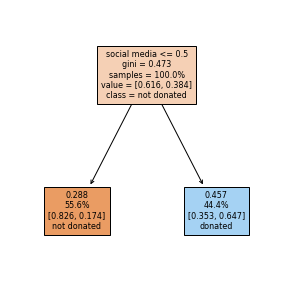

In [634]:
plt.figure(figsize=(5,5))
plot_tree(dtdonations_clf, proportion=True, label='root', 
          feature_names=['social media', 'mobile'], class_names=['not donated','donated'], filled=True, fontsize=8)
plt.show()

The decision tree indicates that if variable 'social media' scores lower than 0.5, no donation is made. If variable scores higher than 0.5, a donation is made. 

In [635]:
test['predicted_donation_DT'] = dtdonations_clf.predict(test[features])

<ipython-input-635-bf86ad63d924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_donation_DT'] = dtdonations_clf.predict(test[features])


Creating a decision tree with control variable 'age'

In [636]:
dtdonations_clf_user = DecisionTreeClassifier()

In [637]:
features_controls

['social media', 'mobile', 'age']

In [638]:
dtdonations_clf_user.fit(train[features_controls], train[target])

DecisionTreeClassifier()

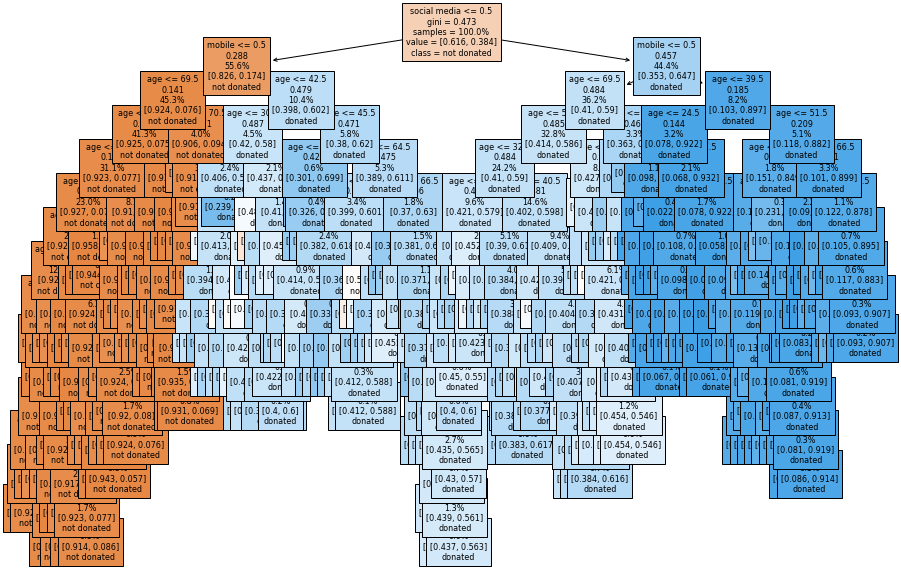

In [639]:
plt.figure(figsize=(15,10))
plot_tree(dtdonations_clf_user, proportion=True, 
          label='root', 
          feature_names=['social media', 'mobile', 'age',], 
          class_names=['not donated','donated'], 
          filled=True, fontsize=8)
plt.show()

The decision tree with the control variables of mobile and age indicates that if the user comes from a social media site and uses a mobile device, a donation is made. If the user does not come from a social media site, but uses a mobile device, a donation is made. If the user does not come froma social media site, and does not use a mobile device, no donation is made. 

In [655]:
test['predicted_donation_DT_user'] = dtdonations_clf_user.predict(test[features_controls])

<ipython-input-655-7cc07c6cb85e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_donation_DT_user'] = dtdonations_clf_user.predict(test[features_controls])


In [656]:
print(classification_report(test['donation_made'], test['predicted_donation_DT']))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      3673
         1.0       0.65      0.75      0.70      2327

    accuracy                           0.75      6000
   macro avg       0.74      0.75      0.74      6000
weighted avg       0.76      0.75      0.75      6000



In [657]:
print(classification_report(test['donation_made'], test['predicted_donation_DT_user']))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      3673
         1.0       0.64      0.88      0.74      2327

    accuracy                           0.76      6000
   macro avg       0.77      0.78      0.76      6000
weighted avg       0.80      0.76      0.77      6000



The classification report of the decision tree indicates that when using the control variables, the over all weighted average is higher (F1 = 0.77) than in the model without the control variables (F1= 0.75). The model with the control variables also fares better on overall precision (0.80) and recall (0.76) than the model without the control variables. 

In order to test H2, the variable 'referral page' will be recategorized into whether the site from which users entered the CI webpage came from Facebook, or not. 
As such, values other than Facebook will be categorized as 'other'

Loading and inspecting dataframe

In [245]:
sessions['referral_page'].value_counts()

other                  6660
Instagram.com          3395
twitter.com            3325
google.com             3323
youtube.com            3315
                       ... 
simmons-davis.com         1
baker-rasmussen.com       1
hicks.info                1
grimes.com                1
gibbs-edwards.com         1
Name: referral_page, Length: 4229, dtype: int64

In [248]:
sessions

,Unnamed: 0,referral,age,geolocation,device,session_id,mobile,desktop,social media,referral_page
0,0,NaN,44,NaN,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,560923,0,1,0,other
1,1,NaN,62,US,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,560924,0,1,0,other
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925,0,1,1,twitter.com
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926,0,1,1,youtube.com
4,4,google.com,40,US,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,560927,0,1,0,google.com
...,...,...,...,...,...,...,...,...,...,...
29995,29995,Instagram.com,67,US,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,590918,0,1,1,Instagram.com
29996,29996,youtube.com,20,NaN,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,590919,0,1,1,youtube.com
29997,29997,youtube.com,65,US,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,590920,0,1,1,youtube.com
29998,29998,youtube.com,28,US,Mozilla/5.0 (iPhone; CPU iPhone OS 5_1_1 like ...,590921,1,0,1,youtube.com


Creating a function to recategorize data on social media (NLP function from course)

In [256]:
def recategorize(category):
    if category == 'Facebook.com':
        return 'Facebook'
    if category == 'Instagram.com':
        return 'social media'
    if category == 'twitter.com':
        return 'social media'
    if category == 'youtube.com':
        return 'social media'
    else:
        return 'other'

Applying function

In [257]:
sessions['category'] = sessions['referral_page'].apply(recategorize)

Checking values

In [258]:
sessions['category'].value_counts()

other           16694
social media    10035
Facebook         3271
Name: category, dtype: int64

Checking for missing values

In [255]:
sessions.isna().sum()

Unnamed: 0          0
referral         6660
age                 0
geolocation      5031
device              0
session_id          0
mobile              0
desktop             0
social media        0
referral_page       0
category            0
dtype: int64

Slicing dataframe to get rid of any cases that did not enter the CI website through a social media page


Inspecting head of dataframe

In [273]:
sessions.head()

,Unnamed: 0,referral,age,geolocation,device,session_id,mobile,desktop,social media,referral_page,category
0,0,NaN,44,NaN,Opera/9.79.(Windows NT 5.2; pl-PL) Presto/2.9....,560923,0,1,0,other,other
1,1,NaN,62,US,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,560924,0,1,0,other,other
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925,0,1,1,twitter.com,social media
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926,0,1,1,youtube.com,social media
4,4,google.com,40,US,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/532.0...,560927,0,1,0,google.com,other


In [274]:
sessions.shape

(30000, 11)

Removing all rows that indicated value 'other' to only keep social media and Facebook as possible values

In [280]:
sessions = sessions.loc[sessions["category"] != 'other']


Checking shape of dataframe

In [276]:
sessions.shape

(13306, 11)

Checking value counts

In [277]:
sessions['category'].value_counts()

social media    10035
Facebook         3271
Name: category, dtype: int64

Checking 'category' variable for missing values

In [282]:
sessions['category'].isna().sum()

0

Assigning values with 'Facebook' as the value '1' and all other values with '0'

In [283]:
sessions['Facebook'] = sessions['category'].apply(wordlist_any_present, args=(['Facebook'], ))

Inspecting head of dataframe if function worked

In [284]:
sessions.head()

,Unnamed: 0,referral,age,geolocation,device,session_id,mobile,desktop,social media,referral_page,category,Facebook
2,2,twitter.com,49,US,Mozilla/5.0 (compatible; MSIE 9.0; Windows 98;...,560925,0,1,1,twitter.com,social media,0
3,3,youtube.com,36,NR,Mozilla/5.0 (Windows NT 4.0; nr-ZA; rv:1.9.1.2...,560926,0,1,1,youtube.com,social media,0
5,5,twitter.com,60,US,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_3 rv...,560928,0,1,1,twitter.com,social media,0
6,6,twitter.com,34,US,Mozilla/5.0 (Windows; U; Windows NT 10.0) Appl...,560929,0,1,1,twitter.com,social media,0
7,7,twitter.com,59,US,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,560930,0,1,1,twitter.com,social media,0


Checking value counts for newly created Facebook variable

In [285]:
sessions['Facebook'].value_counts()

0    10035
1     3271
Name: Facebook, dtype: int64

Checking for missing values in dataframe

In [299]:
sessions.isna().sum()

Unnamed: 0          0
referral            0
age                 0
geolocation      2271
device              0
session_id          0
mobile              0
desktop             0
social media        0
referral_page       0
category            0
Facebook            0
dtype: int64

Creating dataframe with variable that will be used for merging

In [288]:
Facebook_sessions = sessions[['session_id', 'age', 'mobile', 'desktop', 'category', 'Facebook']]

Checking dataframe for missing values

In [300]:
Facebook_sessions.isna().sum()

session_id    0
age           0
mobile        0
desktop       0
category      0
Facebook      0
dtype: int64

Merging datafram Facebook_sessions with donations dataframe on the left. A left merge is approprate for this analysis as this way all Facebook values are kept

In [350]:
Facebook_donations = Facebook_sessions.merge(donations, on='session_id', how='left')

In [351]:
Facebook_donations

,session_id,age,mobile,desktop,category,Facebook,donation,donation_amount
0,560925,49,0,1,social media,0,NaN,NaN
1,560926,36,0,1,social media,0,1.000,131.000
2,560928,60,0,1,social media,0,NaN,NaN
3,560929,34,0,1,social media,0,NaN,NaN
4,560930,59,0,1,social media,0,NaN,NaN
...,...,...,...,...,...,...,...,...
13301,590918,67,0,1,social media,0,1.000,158.000
13302,590919,20,0,1,social media,0,NaN,NaN
13303,590920,65,0,1,social media,0,1.000,123.000
13304,590921,28,1,0,social media,0,1.000,254.000


Inspecting value counts and missing values 

In [355]:
Facebook_donations['category'].value_counts()

social media    10035
Facebook         3271
Name: category, dtype: int64

In [354]:
Facebook_donations['Facebook'].value_counts()

0    10035
1     3271
Name: Facebook, dtype: int64

In [352]:
Facebook_donations['Facebook'].isna().sum()

0

In [353]:
Facebook_donations.isna().sum()

session_id            0
age                   0
mobile                0
desktop               0
category              0
Facebook              0
donation           4673
donation_amount    4673
dtype: int64

Based on the assumption that missing values indicate that no donation was made, missing values in whether a donation has been made are filled with '0'. As a result, the amount of money donated is also filled with '0'

In [357]:
Facebook_donations ['donation_made'] = Facebook_donations ['donation'].fillna(0)

In [358]:
Facebook_donations ['amount_donated'] = Facebook_donations['donation_amount'].fillna(0)

Inpsecting columns for newly created dataframe

In [362]:
Facebook_donations.columns

Index(['session_id', 'age', 'mobile', 'desktop', 'category', 'Facebook',
       'donation', 'donation_amount', 'donation_made', 'amount_donated'],
      dtype='object')

Selecting variables in the Facebook_donationsFinal dataframe that will be used for further analysis

In [363]:
Facebook_donationsFinal = Facebook_donations[['session_id', 'age', 'mobile', 'desktop', 'Facebook', 'donation_made', 'amount_donated']]

Inspecing values from final dataframe Facebook_donationsFinal

In [367]:
Facebook_donationsFinal.head()

,session_id,age,mobile,desktop,Facebook,donation_made,amount_donated
0,560925,49,0,1,0,0.000,0.000
1,560926,36,0,1,0,1.000,131.000
2,560928,60,0,1,0,0.000,0.000
3,560929,34,0,1,0,0.000,0.000
4,560930,59,0,1,0,0.000,0.000


In [720]:
#Checking value counts for how many out of the selected cases made donations
Facebook_donationsFinal['donation_made'].value_counts()

1.000    8633
0.000    4673
Name: donation_made, dtype: int64

In [457]:
Facebook_donationsFinal['mobile'].value_counts()

0    10859
1     2447
Name: mobile, dtype: int64

Running descriptives on all variables.

The data set comparing Facebook and other social media site users retained 13306 cases. Descriptive statistics and value counts show that 8633 users donated, and 4673 users did not donate. A grouped statistic shows that users that entered the site through Facebook made an average donation of USD72.18 while users that entered the site through other social media sites donated a mean of USD82.11. Running a bar plot comparing the amount donated between Facebook and other social media site users also indicated that the mean amount donated through Facebook is USD127.70, while the mean amount donated through other social media sites is USD92.28, suggesting that there is a significant relationship between entering through Facebook and amount donated. The control variable of age indicates a mean of 45 years old with a range from the minimum age of 18 years old to the maximum age of 74 years old. The control variable of ‘mobile’ indicated that 10869 users that donated entered the site on a desktop device and 2447 users entered on a mobile device. Regarding unbalances and biases, the number of cases extracted does not necessarily correlate with CIs much larger following on all social media platforms provided in the data, thus introducing an element of bias. 

In [369]:
Facebook_donationsFinal[['age', 'donation_made', 'amount_donated', 'mobile', 'desktop', 'Facebook']].describe()

,age,donation_made,amount_donated,mobile,desktop,Facebook
count,13306.000,13306.000,13306.000,13306.000,13306.000,13306.000
mean,45.923,0.649,100.983,0.184,0.816,0.246
std,16.522,0.477,81.226,0.387,0.387,0.431
min,18.000,0.000,0.000,0.000,0.000,0.000
25%,32.000,0.000,0.000,0.000,1.000,0.000
50%,46.000,1.000,123.000,0.000,1.000,0.000
75%,60.000,1.000,158.000,0.000,1.000,0.000
max,74.000,1.000,289.000,1.000,1.000,1.000


Descriptive statistics grouped by whether users came from Facebook or not and the amount donated. Amount donated is much higher when the site referral is from Facebook, suggesting that Facebook referrals may be an influential factor influencing the amount of USD donated. 

In [370]:
Facebook_donationsFinal.groupby(['Facebook'])['amount_donated'].describe()

,count,mean,std,min,25%,50%,75%,max
Facebook,,,,,,,,
0,10035.000,92.277,82.112,0.000,0.000,114.000,158.000,289.000
1,3271.000,127.695,72.175,0.000,105.000,140.000,166.000,289.000


In [723]:
Facebook_donationsFinal.groupby(['mobile'])['donation_made'].describe()

,count,mean,std,min,25%,50%,75%,max
mobile,,,,,,,,
0,10859.000,0.594,0.491,0.000,0.000,1.000,1.000,1.000
1,2447.000,0.893,0.309,0.000,1.000,1.000,1.000,1.000


Overall donations distribution plot

C:\Users\Lukas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_donated', ylabel='Density'>

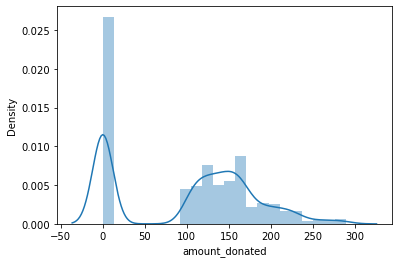

In [371]:
sns.distplot(Facebook_donationsFinal['amount_donated'])

The distribution plot indicates that most donations made range from 100 USD to 200 USD

C:\Users\Lukas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='donation_made', ylabel='Density'>

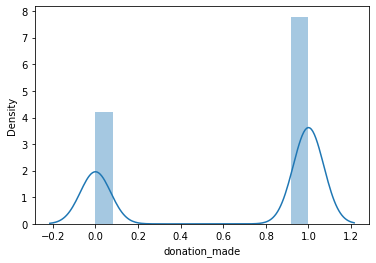

In [453]:
sns.distplot(Facebook_donationsFinal['donation_made'])

The distribution plot indicates a higher number of users that made a donation (1.0) than users that did not make a donation (0.0)

<AxesSubplot:xlabel='Facebook', ylabel='count'>

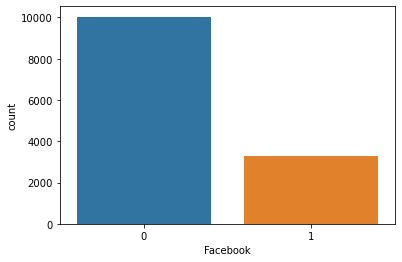

In [728]:
##Barplot indicating site referral from Facebook and other social media sites
sns.countplot(x='Facebook', data=Facebook_donationsFinal)

<AxesSubplot:xlabel='donation_made', ylabel='count'>

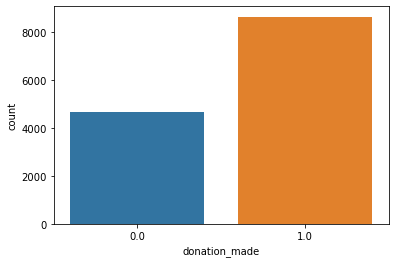

In [727]:
##Barplot indicating donations made and no donations made
sns.countplot(x='donation_made', data=Facebook_donationsFinal)

Barplot indicating the amount donated whether the website referral is from Facebook or not. Results show a clear relationship that the average amount donated goes up significantly if the referral is from Facebook. 

<AxesSubplot:xlabel='Facebook', ylabel='amount_donated'>

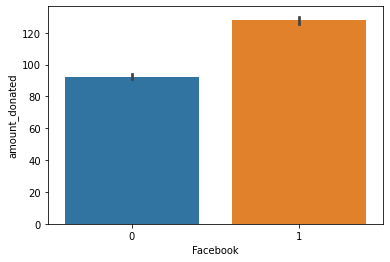

In [726]:
sns.barplot(x='Facebook', y='amount_donated', data=Facebook_donationsFinal)

<AxesSubplot:xlabel='mobile', ylabel='donation_made'>

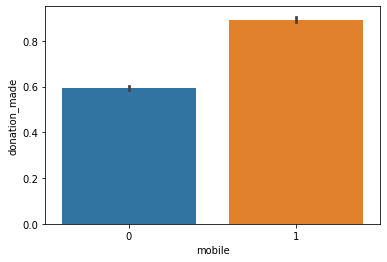

In [724]:
##Barplot indicating a relationship between the control variable 'mobile' and whether a donation has been made
sns.barplot(x='mobile', y='donation_made', data=Facebook_donationsFinal)

H2a: Users being referred to the site via Facebook make higher donations (in USD) than users from other social media sites. 

Testing the hypothesis using linear regression from the imported package. Specified 'amount_donated' as the dependent variable, followed by the independent and control variables. Due to having multiple control variables and a continous dependent variable alongside the independent variable and quantity is tested, a linear regression analysis will be used 

In [738]:
##Creating linear regression model using amount donated as dependent and Facebook, mobile and age as control variables
ols_statFB = sm.OLS(Facebook_donationsFinal['amount_donated'], sm.add_constant(Facebook_donationsFinal[['Facebook', 'mobile', 'age']]))

Asking model to run

In [395]:
result_ols = ols_statFB.fit()

In [396]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         amount_donated   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     1120.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        03:54:05   Log-Likelihood:                -75891.
No. Observations:               13306   AIC:                         1.518e+05
Df Residuals:                   13302   BIC:                         1.518e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4351      1.917     39.344      0.0

The model shows that users coming from Facebook compared to other social media sites donate more money to the cause. This effect is statistically significant and positive (coefficient = 34.54). The effect of using a mobile device is also positive and statistically significant (coefficient = 85.53). The effect of age is positive but not statistically significant

In [397]:
ols_clfFB = LinearRegression(fit_intercept = True) 

Usinf fit_intercept to make sure we are using the same model

In [398]:
ols_clfFB.fit(Facebook_donationsFinal[['Facebook', 'mobile', 'age']], Facebook_donationsFinal['amount_donated'])

LinearRegression()

Predicting different combinations of independent and control variables on the dependent variable. First prediction is using the Facebook  variable, in combination with the mobile variable without the age variable. The result is that a predicted amount of USD195.50 is donated

In [399]:
ols_clfFB.predict([[1,1,0]])

array([195.49849387])

The second prediction is using the Facebook variable without the variable indicating whether the user used a mobile device but including the age variable. The result is that a predicted amount of USD110.00 is donated.

In [401]:
ols_clfFB.predict([[1,0,1]])

array([110.00005716])

The linear regression model shows that users coming from Facebook compared to other social media sites donate more money to the cause. This effect is statistically significant and positive. The predictions on different combinations conform with the overall model in which age is not a significant influence on the amount donated. Overall, H2a can be retained. Facebook website referrals make higher donations (in USD) than referrals from other social media sites. 

H2b: Users being referred to the site via Facebook will make a higher number of donations than users from other social media referral sites. 

Testing the hypothesis using logistical regression from the imported package.'Donations_made' is specified as the dependent variable followed by the independent and control variables. Due to having multiple control variables alongside the independent variable and the dependent variable being binary and probability of making a donation is tested, a logistical regression analysis will be used.

Asking for train and test dataset to be created in order to assess the performace of the algorithm. The size of the test set should 20% of the size of the total dataset. A random command is also used to make sure the train and test splits always look the same

In [673]:
train2, test2 = train_test_split(Facebook_donationsFinal, test_size=0.2, random_state=42)

Inspecting head and length of training and test sets

In [674]:
train2.head()

,session_id,age,mobile,desktop,Facebook,donation_made,amount_donated
8358,579846,63,0,1,1,1.000,123.000
5202,572745,40,1,0,0,1.000,201.000
9202,581752,47,1,0,0,0.000,0.000
9677,582815,19,0,1,0,0.000,0.000
4617,571417,58,0,1,1,1.000,118.000


In [675]:
len (train2)

10644

In [676]:
test2.tail()

,session_id,age,mobile,desktop,Facebook,donation_made,amount_donated
7773,578544,65,0,1,0,1.000,123.000
3434,568675,47,0,1,0,0.000,0.000
694,562464,49,0,1,0,1.000,104.000
5168,572658,56,0,1,0,0.000,0.000
11306,586412,64,0,1,1,1.000,221.000


In [677]:
len(test2)

2662

In [678]:
target = "donation_made"
features = ['Facebook']

Naming model logit_statsFB and indicating the training set to include target, the dependent variable, and the features, the independent and control variables

In [679]:
logit_statsFB = sm.Logit(train2[target], sm.add_constant(train2[features]))

In [680]:
result_logit = logit_statsFB.fit()

Optimization terminated successfully.
         Current function value: 0.627684
         Iterations 5


Printing model

In [681]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:          donation_made   No. Observations:                10644
Model:                          Logit   Df Residuals:                    10642
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                 0.03092
Time:                        19:47:07   Log-Likelihood:                -6681.1
converged:                       True   LL-Null:                       -6894.3
Covariance Type:            nonrobust   LLR p-value:                 9.919e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3916      0.023     17.191      0.000       0.347       0.436
Facebook       1.0589      0.055     19.388      0.000       0.952       1.166


The model shows that users being referred to the site via Facebook (coefficient = 1.06) are more likely to donate than users from other social media sites. The Pseudo R square of the model is 0.03 

Adding control variable of age and mobile

In [682]:
features_controls = ['Facebook', 'mobile', 'age']

Naming model logit_stats_userFB and including the target as well as independent and control variables

In [683]:
logit_stats_userFB = sm.Logit(train2[target], sm.add_constant(train2[features_controls]))

In [684]:
result_logit_userFB = logit_stats_userFB.fit()

Optimization terminated successfully.
         Current function value: 0.592658
         Iterations 6


Printing model

In [685]:
print(result_logit_userFB.summary())

                           Logit Regression Results                           
Dep. Variable:          donation_made   No. Observations:                10644
Model:                          Logit   Df Residuals:                    10640
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                 0.08500
Time:                        19:47:37   Log-Likelihood:                -6308.3
converged:                       True   LL-Null:                       -6894.3
Covariance Type:            nonrobust   LLR p-value:                8.622e-254
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0339      0.064      0.528      0.598      -0.092       0.160
Facebook       1.0996      0.056     19.714      0.000       0.990       1.209
mobile         1.7691      0.076     23.134      0.0

After adding the control variables to the model, the Pseudo R square increased to 0.09, indicating a slightly better performance. Using Facebook (coefficient = 1.1) has a positive and significant effect on the dependent variable. The control variable mobile also has a positive and statistically significant effect on whether a donation is made (coefficient = 1.77)

Using supervised machine learning. Using the training set for logistic regression analysis

In [686]:
logit_FB_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [687]:
features

['Facebook']

In [688]:
target

'donation_made'

In [689]:
logit_FB_clf.fit(train2[features], train2[target])

LogisticRegression(max_iter=1000)

Creating another model, with the variables of mobile and age

In [691]:
logit_clf_FBuser = LogisticRegression(max_iter=1000, fit_intercept = True)

Checking controls

In [692]:
features_controls

['Facebook', 'mobile', 'age']

In [693]:
logit_clf_FBuser.fit(train2[features_controls], train2[target])

LogisticRegression(max_iter=1000)

Including Facebook and age variables, without mobile variable. Likelihood of making a donation is 76%

In [694]:
logit_clf_FBuser.predict_proba([[1,0,1]])

array([[0.24346565, 0.75653435]])

Including Facebook and mobile variable, without age variable. Likelihood of making a donation is 95%

In [695]:
logit_clf_FBuser.predict_proba([[1,1,0]])

array([[0.05264778, 0.94735222]])

Including all variables. Likelihood of making a donation is 95%

In [696]:
logit_clf_FBuser.predict_proba([[1,1,1]])

array([[0.0525312, 0.9474688]])

H2b can be retained. The Pseudo R square of the model is 0.03. After adding the control variables to the model, the Pseudo R square increased to 0.09, indicating a slightly better performance. This is also reflected when predicting different combinations of control and independent variables

Comparing model on performance: Asking for predictions on the test set from first model and adding features from the training set and creating new variable 'predicted_FBdonation_logit'

In [697]:
test2['predicted_FBdonation_logit'] = logit_FB_clf.predict(test2[features])

<ipython-input-697-b55bb656ce52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predicted_FBdonation_logit'] = logit_FB_clf.predict(test2[features])


Checking value counts

In [698]:
test2['predicted_FBdonation_logit'].value_counts()

1.000    2662
Name: predicted_FBdonation_logit, dtype: int64

The supervised machine learning models are not able to predict the value 0, thus questioning the effect. 

Comparing prediction dataset to actuality if whether a donation was made

In [700]:
test2[['donation_made', 'predicted_FBdonation_logit']].tail()

,donation_made,predicted_FBdonation_logit
7773,1.000,1.000
3434,0.000,1.000
694,1.000,1.000
5168,0.000,1.000
11306,1.000,1.000


Asking for predictions on the test set from first model and adding features from the training set and creating new variable 'predicted_donation_logit_FBuser'

In [701]:
test2['predicted_donation_logit_FBuser'] = logit_clf_FBuser.predict(test2[features_controls])

<ipython-input-701-f9929ce6c652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predicted_donation_logit_FBuser'] = logit_clf_FBuser.predict(test2[features_controls])


Checking value counts

In [702]:
test2['predicted_donation_logit_FBuser'].value_counts()

1.000    2662
Name: predicted_donation_logit_FBuser, dtype: int64

In [703]:
test2[['donation_made', 'predicted_FBdonation_logit', 'predicted_donation_logit_FBuser']].tail()

,donation_made,predicted_FBdonation_logit,predicted_donation_logit_FBuser
7773,1.000,1.000,1.000
3434,0.000,1.000,1.000
694,1.000,1.000,1.000
5168,0.000,1.000,1.000
11306,1.000,1.000,1.000


Creating a confusion matrix

In [705]:
print(confusion_matrix(test2['donation_made'], test2['predicted_FBdonation_logit']))

[[   0  943]
 [   0 1719]]


In [706]:
print(confusion_matrix(test2['donation_made'], test2['predicted_donation_logit_FBuser']))

[[   0  943]
 [   0 1719]]


In [707]:
print(classification_report(test2['donation_made'], test2['predicted_FBdonation_logit']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       943
         1.0       0.65      1.00      0.78      1719

    accuracy                           0.65      2662
   macro avg       0.32      0.50      0.39      2662
weighted avg       0.42      0.65      0.51      2662



C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [708]:
print(classification_report(test2['donation_made'], test2['predicted_donation_logit_FBuser']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       943
         1.0       0.65      1.00      0.78      1719

    accuracy                           0.65      2662
   macro avg       0.32      0.50      0.39      2662
weighted avg       0.42      0.65      0.51      2662



C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After running a classification report on the models it can be observed that the supervised machine learning models are not able to predict the value '0', thus underperforming and questioning the validity of these models. 

Creating a decision tree for the model without control variables using whether a user came from Facebook as the feature

In [670]:
dtFBdonations_clf = DecisionTreeClassifier()

In [709]:
dtFBdonations_clf.fit(train2[features], train2[target])

DecisionTreeClassifier()

In [710]:
features

['Facebook']

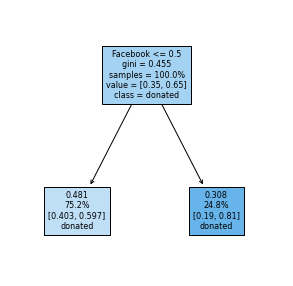

In [711]:
plt.figure(figsize=(5,5))
plot_tree(dtFBdonations_clf, proportion=True, label='root', 
          feature_names=['Facebook'], class_names=['not donated','donated'], filled=True, fontsize=8)
plt.show()

The model conforms with the inability to predict the value '0'. It is thus important to create another decision tree including the control variables.

Creating decision tree variable features from tested model 

In [712]:
test2['predicted_FBdonation_DT'] = dtFBdonations_clf.predict(test2[features])

<ipython-input-712-3ab484d4ecd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predicted_FBdonation_DT'] = dtFBdonations_clf.predict(test2[features])


Creating decision tress including control variable age and mobile

Creating decision tree classified and naming it dtFBdonations_clf_control

In [713]:
dtFBdonations_clf_control = DecisionTreeClassifier()

In [714]:
dtFBdonations_clf_control.fit(train2[features_controls], train2[target])

DecisionTreeClassifier()

In [715]:
features_controls

['Facebook', 'mobile', 'age']

Printing decision tree

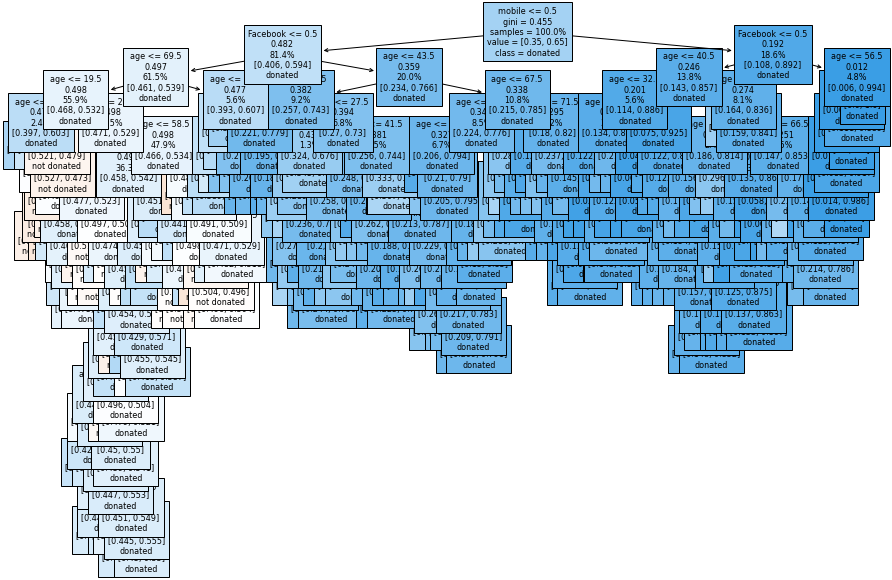

In [716]:
plt.figure(figsize=(15,10))
plot_tree(dtFBdonations_clf_control, proportion=True, 
          label='root', 
          feature_names=['Facebook', 'mobile', 'age',], 
          class_names=['not donated','donated'], 
          filled=True, fontsize=8)
plt.show()

The decision tree indicates that if users are using a mobile device and coming from Facebook, a donation is made. However, the age variable indicates that this is not true for all ages represented in the cases of the analysis.

Creating classification reports for the two decision trees.

In [717]:
test2['predicted_FBdonation_DT_user'] = dtFBdonations_clf_control.predict(test2[features_controls])

<ipython-input-717-79509799c754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predicted_FBdonation_DT_user'] = dtFBdonations_clf_control.predict(test2[features_controls])


In [718]:
print(classification_report(test2['donation_made'], test2['predicted_FBdonation_DT']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       943
         1.0       0.65      1.00      0.78      1719

    accuracy                           0.65      2662
   macro avg       0.32      0.50      0.39      2662
weighted avg       0.42      0.65      0.51      2662



C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [719]:
print(classification_report(test2['donation_made'], test2['predicted_FBdonation_DT_user']))

              precision    recall  f1-score   support

         0.0       0.49      0.25      0.33       943
         1.0       0.68      0.86      0.76      1719

    accuracy                           0.64      2662
   macro avg       0.58      0.55      0.54      2662
weighted avg       0.61      0.64      0.60      2662



The classification report indicates that when using all control variables, the overall score (f1 = 0.60) is higher than in the decision tree not including the control variables (f1 = 0.51). However, it should be noted that the model is underperforming in not predicting the value '0', thus questioning its validity. 

Overall in the context of this section of the analysis H2b can be retained. The Pseudo R square of the model without the control variables is 0.03. After adding the control variables to the model, the Pseudo R square increased to 0.09, indicating a slightly better performance. This is also reflected when combing Facebook site referral and using a mobile device, predicting a likelihood of a donation being made at 95%. Age without the mobile variable only predicts a 76% likelihood of donating. However, supervised machine learning models are not able to predict the value '0', thus questioning the effect. When running the decision tree classifier algorithm though, the F1 score of the model using control variables fares over all better. However, even though the logistical regression model indicates a significant positive relationship between Facebook site referral and whether a donation is made, the supervised machine learning is underperforming making its prediction remain very questionable.  

All hypotheses of this study can be retained. This should give CI an indication of how most of its donors are getting referred to the CI website. Based on the regression model and machine learning algorithms of this study, social media platforms of YouTube, Instagram, Twitter and Facebook yield more influence in the number as well as the amount of donations being made to the NGO. Moreover, Facebook especially, when compared to other social media sites, is performing very well in driving traffic and donors to the CI website. CI should thus focus on targeting ads onto Facebook, followed by other social media platforms, instead of non-social media websites. The basic design of smartphones allow for different interaction frameworks compared to desktops, affecting user experiences and behaviour (de Sa et al., 2013). As device type also yields an influence on donation behaviour based on this study, ads can be made more mobile tailored, giving users the option to get to interact with the cause in a more novel manner. Furthermore, the significant effect of having a mobile device and donating behaviour based on the data available can give CI and other NGOs more cause for investigation. 

Limitations and next steps

The analysis at hand aimed at understanding the relationship between social media website referrals and donating behaviour though there are some limitations to this study. Particularly, focus was on social media platforms in general and then, based on the theoretical backbone of the study, a closer look on Facebook. As such, a deeper analysis for other social media platforms, namely Instagram, Twitter and YouTube has not been performed. Conclusions about general donating behaviour should thus not extent beyond the results of this study. A more thorough investigation and cross comparison between various social media platforms and whether users donate and how much is donated is required to draw in a more generalized conclusion. Furthermore, this paper was operating under a specific contextual context in which the assumption was made that users that donate come from an online ad campaign, neglecting more organic ways of donating behaviour. Especially the influence of Google as a mechanism of driving donations has not been discussed here. Early data inspections did indicate that Google yields for a higher amount of website referrals than other social media. However, because Google is not a social media site it was categorized as ‘other’ for the sake of this analysis. Future research should thus investigate Google, in comparison with other social media platforms and other website referrals, for its impacts on donating behaviour. In addition, the number of cases initially provided by the data and the number of cases eventually retained after cleaning and selecting relevant cases only represents a small degree of CI’s large cross-media following. Future studies should consider incorporating a larger number of cases in the initial data sets before cleaning the data, increasing generalizability of the following across all of CI’s social media platforms. It should also be noted that the modelling and supervised machine learning for H2b underperformed in predicting the value ‘0’, corresponding to users not donating. Even though the decision tree classifier gave an average score of 0.6 to the model using the control variables of age and mobile device, future research should consider the limitation of the underperformance and be careful in using the model. As such, particularly in the case of H2b, while retained, it is especially difficult to generalize the prediction that Facebook website referrals lead to more donations being made. To mitigate this limitation should also incorporate more control variables that could be of relevance. Geolocation, while part of the original data set has not been included in the final analysis, though has the potential of influencing the outcome variable. Due to CI’s pancontinental presence, geolocation of users also provides an interesting perspective for future research to explore. Depending on the results, ad campaigns can then also incorporate the findings in tailoring ads to specific parts of around the globe.  

Ethical issues and normative considerations

Ethical considerations in the analysis conducted centre on the notion of assumption making. Should CI choose to follow the recommendations made in this paper, those being targeting ads to social media and Facebook users, the organizations needs to be aware of the implications such targeting can create. As put forward by Tramer et al. (2017), the digital trace data that is used here, if not handled with great care, can lead to unfair treatments based on assumptions. The correlation between social media use and making donations or amount donated is a fabricated assumption that was fed into the algorithm by the researcher. Moreover, based on the assumptions fed into the algorithm, specific groups in society may be favoured to other groups. In the case of this research, targeted ads may be less likely shown to desktop users, or non-Facebook users, creating unequal playing fields of donating behaviour, ultimately also affecting CI as an organization because certain donors, those not coming from social media sites, may be lost in the process. This also true should more control variables be added, such as geolocation, further accentuating inequalities based on assumptions made on donating behaviour by targeting only specific countries. Furthermore, users of the internet used in this study are not representative of the larger population of internet users. As such, the data that has been extracted for this study gives the potential to underrepresent the part of the population that does not use social media sites to make donations. Especially in the case of social media platforms other than Facebook, which is usually not used by those of a lesser socioeconomic status because of the absence of necessary internet skills (Hargittai, 2020). Regarding data visualization in the study at hand, oversimplification can occur. The visualization used in the analysis are based on aggregate numbers created by the researcher. This could ultimately lead to small differences becoming more visible than they should be and thus play into biased opinions and prejudices. Furthermore, by omitting certain data points and control variables, trends can be visualized that do not actually exist. This can mislead organizations and those viewing the data to focus on correlations that may not be as impactful as portrayed in the study (Grindrod, 2016). Should CI and other NGOs use digital trace data in the future to obtain donating behaviour, such ethical implications must be considered.  

Bibliography

Andersson, S., & Wikström, N. (2017). Why and how are social media used in a B2B context, and which stakeholders are involved?. Journal of Business & Industrial Marketing. 

Clark, J. D., & Themudo, N. S. (2006). Linking the web and the street: Internet-based “dotcauses” and the “anti-globalization” movement. World Development, 34(1), 50-74.

de Sa, M., Navalpakkam, V., & Churchill, E. F. (2013, April). Mobile advertising: evaluating the effects of animation, user and content relevance. In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 2487-2496).

Grindrod, P. (2016). Beyond privacy and exposure: ethical issues within citizen-facing analytics. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2083), 20160132.

Hargittai, E. (2020). Potential biases in big data: Omitted voices on social media. Social Science Computer Review, 38(1), 10-24.
Kelly, K. S. (2012). Effective fund-raising management. Routledge. 

Men, L. R., & Tsai, W. H. S. (2015). Infusing social media with humanity: Corporate character, public engagement, and relational outcomes. Public Relations Review, 41(3), 395-403.

Özdemir, B. P. (2012). Social media as a tool for online advocacy campaigns: Greenpeace Mediterranean's anti genetically Engineered Food Campaign in Turkey. Global Media Journal, 5(2), 23. 

Pressgrove, G. N., & McKeever, B. W. (2016). Nonprofit relationship management: Extending the organization-public relationship to loyalty and behaviors. Journal of Public Relations Research, 28(3-4), 193-211. 

Tramer, F., Atlidakis, V., Geambasu, R., Hsu, D., Hubaux, J. P., Humbert, M., ... & Lin, H. (2017, April). Fairtest: Discovering unwarranted associations in data-driven applications. In 2017 IEEE European Symposium on Security and Privacy (EuroS&P) (pp. 401-416). IEEE. 

Voorveld, H. A., Van Noort, G., Muntinga, D. G., & Bronner, F. (2018). Engagement with social media and social media advertising: The differentiating role of platform type. Journal of advertising, 47(1), 38-54.
